# Loan Defaulter Detection

### A. Import dependencies

In [1]:
import pandas as pd
from matplotlib import pyplot
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency, pearsonr, spearmanr
%matplotlib inline

### B. Import the Dataset
Ensure that you have the Loan_Default.csv in the root directory for this, the link to the Kaggle site can be found in the README file.

In [3]:
df = pd.read_csv("Loan_Default_Cleaned.csv")

# Let's take a look at the first 5 rows
df.head()

,Unnamed: 0,ID,year,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,property_value,income,...,construction_type,occupancy_type,Secured_by,total_units,credit_type,co-applicant_credit_type,age,submission_of_application,Region,Security_Type
0,0,24890.0,2019.0,116500.0,4.201667,0.972767,3405.226667,360.0,118000.000000,1740.0,...,sb,pr,home,1U,EXP,CIB,25-34,to_inst,south,direct
1,1,24891.0,2019.0,206500.0,3.996667,0.677800,558.893333,360.0,281333.333333,4980.0,...,sb,pr,home,1U,EQUI,EXP,55-64,to_inst,North,direct
2,2,24892.0,2019.0,406500.0,4.560000,0.200000,595.000000,360.0,508000.000000,9480.0,...,sb,pr,home,1U,EXP,CIB,35-44,to_inst,south,direct
3,3,24893.0,2019.0,456500.0,4.250000,0.681000,124.500000,360.0,658000.000000,11880.0,...,sb,pr,home,1U,EXP,CIB,45-54,not_inst,North,direct
4,4,24894.0,2019.0,696500.0,4.000000,0.304200,0.000000,360.0,758000.000000,10440.0,...,sb,pr,home,1U,CRIF,EXP,25-34,not_inst,North,direct


### C. Explore Dataset

In [4]:
# There are 14,8670 rows with 34 columns/features.
df.shape

(148670, 35)

Look at the column breakdown for the dataset first, to see what we may be dealing with

In [5]:
# Reveals column information, such as number of rows that are not null, and the data type held
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 35 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Unnamed: 0                 148670 non-null  int64  
 1   ID                         148670 non-null  float64
 2   year                       148670 non-null  float64
 3   loan_amount                148670 non-null  float64
 4   rate_of_interest           148670 non-null  float64
 5   Interest_rate_spread       148670 non-null  float64
 6   Upfront_charges            148670 non-null  float64
 7   term                       148670 non-null  float64
 8   property_value             148670 non-null  float64
 9   income                     148670 non-null  float64
 10  Credit_Score               148670 non-null  float64
 11  LTV                        148670 non-null  float64
 12  Status                     148670 non-null  float64
 13  dtir1                      14

*Note: from here, we can see that many of the columns are not completely filled with non-null values. There is a need to either remove these rows or fill the NaN values

In [6]:
df.describe()

,Unnamed: 0,ID,year,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,property_value,income,Credit_Score,LTV,Status,dtir1
count,148670.000000,148670.000000,148670.0,1.486700e+05,148670.000000,148670.000000,148670.000000,148670.000000,1.486700e+05,148670.000000,148670.000000,148670.000000,148670.000000,148670.000000
mean,74334.500000,99224.500000,2019.0,3.311177e+05,4.028634,0.440776,3117.482265,335.129717,4.936154e+05,6952.422412,699.789103,73.273993,0.246445,37.933114
std,42917.476598,42917.476598,0.0,1.839093e+05,0.525193,0.492539,2966.166712,58.407773,3.557329e+05,6383.046255,115.875857,39.792589,0.430942,10.061503
min,0.000000,24890.000000,2019.0,1.650000e+04,0.000000,-3.638000,0.000000,96.000000,8.000000e+03,0.000000,500.000000,0.967478,0.000000,5.000000
25%,37167.250000,62057.250000,2019.0,1.965000e+05,3.625000,0.091500,910.550000,360.000000,2.680000e+05,3780.000000,599.000000,62.152778,0.000000,32.000000
50%,74334.500000,99224.500000,2019.0,2.965000e+05,3.990000,0.393400,2582.518333,360.000000,4.180000e+05,5760.000000,699.000000,75.519474,0.000000,39.000000
75%,111501.750000,136391.750000,2019.0,4.365000e+05,4.375000,0.758700,4444.562500,360.000000,6.180000e+05,8520.000000,800.000000,86.139456,0.000000,45.000000
max,148669.000000,173559.000000,2019.0,3.576500e+06,8.000000,3.357000,60000.000000,360.000000,1.650800e+07,578580.000000,900.000000,7831.250000,1.000000,61.000000


### D. Data Cleaning

In [7]:
# lowercase all columns name for standardisation purposes
df.columns = df.columns.str.lower()

We can drop these rows since training any model using them will cause incomplete data to be used, which can negatively affect results.

We cannot remove the rows that has NaN in 'rate of interest', 'interest_rate_spread', 'upfront_charges' as it removes majority of status = 1*

In [8]:
no_na_df = df.dropna(subset=df.columns.difference(['rate_of_interest','interest_rate_spread','upfront_charges']))

# All columns in this new dataframe should have the same number of non-null rows
no_na_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 35 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   unnamed: 0                 148670 non-null  int64  
 1   id                         148670 non-null  float64
 2   year                       148670 non-null  float64
 3   loan_amount                148670 non-null  float64
 4   rate_of_interest           148670 non-null  float64
 5   interest_rate_spread       148670 non-null  float64
 6   upfront_charges            148670 non-null  float64
 7   term                       148670 non-null  float64
 8   property_value             148670 non-null  float64
 9   income                     148670 non-null  float64
 10  credit_score               148670 non-null  float64
 11  ltv                        148670 non-null  float64
 12  status                     148670 non-null  float64
 13  dtir1                      14

View the 1st 5 rows again (just to revisit the data)

In [9]:
no_na_df.head()

,unnamed: 0,id,year,loan_amount,rate_of_interest,interest_rate_spread,upfront_charges,term,property_value,income,...,construction_type,occupancy_type,secured_by,total_units,credit_type,co-applicant_credit_type,age,submission_of_application,region,security_type
0,0,24890.0,2019.0,116500.0,4.201667,0.972767,3405.226667,360.0,118000.000000,1740.0,...,sb,pr,home,1U,EXP,CIB,25-34,to_inst,south,direct
1,1,24891.0,2019.0,206500.0,3.996667,0.677800,558.893333,360.0,281333.333333,4980.0,...,sb,pr,home,1U,EQUI,EXP,55-64,to_inst,North,direct
2,2,24892.0,2019.0,406500.0,4.560000,0.200000,595.000000,360.0,508000.000000,9480.0,...,sb,pr,home,1U,EXP,CIB,35-44,to_inst,south,direct
3,3,24893.0,2019.0,456500.0,4.250000,0.681000,124.500000,360.0,658000.000000,11880.0,...,sb,pr,home,1U,EXP,CIB,45-54,not_inst,North,direct
4,4,24894.0,2019.0,696500.0,4.000000,0.304200,0.000000,360.0,758000.000000,10440.0,...,sb,pr,home,1U,CRIF,EXP,25-34,not_inst,North,direct


In [10]:
no_na_df.status.value_counts()

status
0.0    112031
1.0     36639
Name: count, dtype: int64

Convert the important categorical variable to numerical form for correlation testing

In [11]:
# loan type
no_na_df["loan_type"] = no_na_df["loan_type"].replace("type1", 1)
no_na_df["loan_type"] = no_na_df["loan_type"].replace("type2", 2)
no_na_df["loan_type"] = no_na_df["loan_type"].replace("type3", 3)

# Credit Worthiness
no_na_df["credit_worthiness"] = no_na_df["credit_worthiness"].replace("l1", 1)
no_na_df["credit_worthiness"] = no_na_df["credit_worthiness"].replace("l2", 2)

# Gender (testing)
no_na_df["gender"] = no_na_df["gender"].replace("Male", 1)
no_na_df["gender"] = no_na_df["gender"].replace("Female", 2)
no_na_df["gender"] = no_na_df["gender"].replace("Joint", 3)
no_na_df["gender"] = no_na_df["gender"].replace("Sex Not Available", 4)


We can first look at the correlation between the important variables and loan status (categorical).

These variables are:
1. Debt-to-income (continuous)
2. Loan Amount (continuous)
3. Loan Type (categorical)
4. Rate of interest (continuous)
5. Credit worthiness (categorical)
6. Credit Score (continuous)
7. Income (continuous)

Check correlation between individual important features and the loan status (chance of default)

In [16]:
# Pearson (linear correlation between continuous-continuous or continuous-categorical variables)
debt_status_corr_p, _ = pearsonr(no_na_df["dtir1"], no_na_df["status"])
debt_status_corr_s, _ = spearmanr(no_na_df["dtir1"], no_na_df["status"])

# Gender (Experimental Secondary Analysis) - Categorical-categorical, needs chi-square test
gender_status_contingency_table = pd.crosstab(no_na_df["gender"], no_na_df["status"])
g_s_chi2, g_s_p_value, _, _ = chi2_contingency(gender_status_contingency_table)
la_status_corr_p, _ = pearsonr(no_na_df["loan_amount"], no_na_df["status"])
la_status_corr_s, lasp, = spearmanr(no_na_df["loan_amount"], no_na_df["status"])
lt_status_corr_p, _ = pearsonr(no_na_df["loan_type"], no_na_df["status"]) 
lt_status_corr_s, _ = spearmanr(no_na_df["loan_type"], no_na_df["status"]) 
roi_status_corr_p, _ = pearsonr(no_na_df["rate_of_interest"], no_na_df["status"])
roi_status_corr_s, _ = spearmanr(no_na_df["rate_of_interest"], no_na_df["status"])
cw_status_corr_p, _ = pearsonr(no_na_df["credit_worthiness"], no_na_df["status"])
cw_status_corr_s, _ = spearmanr(no_na_df["credit_worthiness"], no_na_df["status"])
cs_status_corr_p, _ = pearsonr(no_na_df["credit_score"], no_na_df["status"])
cs_status_corr_s, _ = spearmanr(no_na_df["credit_score"], no_na_df["status"])
income_status_corr_p, _ = pearsonr(no_na_df["income"], no_na_df["status"])
income_status_corr_s, iscs_p = spearmanr(no_na_df["income"], no_na_df["status"])
print("Debt Status - Status Correlation (pearson, spearman):", debt_status_corr_p, debt_status_corr_s) 
print("Gender - Status Correlation (chi-square, p_value):", g_s_chi2, g_s_p_value) 
print("Loan Amount - Status Correlation (pearson, spearman, p_value):", la_status_corr_p, la_status_corr_s, lasp)
print("Loan Type - Status Correlation (pearson, spearman):", lt_status_corr_p, lt_status_corr_s)
print("Rate of Interest - Status Correlation (pearson, spearman):", roi_status_corr_p, roi_status_corr_s) 
print("Credit Worthiness - Status Correlation (pearson, spearman):", cw_status_corr_p, cw_status_corr_s) 
print("Credit Score - Status Correlation (pearson, spearman):", cs_status_corr_p, cs_status_corr_s) 
# small negative non-linear correlation => lower the income, higher the chance of defaulting
print("Income - Status Correlation (pearson, spearman, p_value):", income_status_corr_p, income_status_corr_s, iscs_p) 

Debt Status - Status Correlation (pearson, spearman): 0.06504367973675651 0.06712277270727421
Gender - Status Correlation (chi-square, p_value): 1043.6008495787444 6.260048330360408e-226
Loan Amount - Status Correlation (pearson, spearman, p_value): -0.036825275544368354 -0.06884161419818988 1.3178355318827435e-155
Loan Type - Status Correlation (pearson, spearman): 0.052300501033370736 0.06968855795703871
Rate of Interest - Status Correlation (pearson, spearman): -0.0542613048725032 -0.042866704834037414
Credit Worthiness - Status Correlation (pearson, spearman): 0.034874921526511976 0.03487492152652677
Credit Score - Status Correlation (pearson, spearman): 0.004003693595587568 0.003985708677723151
Income - Status Correlation (pearson, spearman, p_value): -0.06487852779434719 -0.13796037225702099 0.0


Check correlation between the debt status and other features

In [17]:
debt_la_corr = np.corrcoef(no_na_df["dtir1"], no_na_df["loan_amount"])[0, 1]
debt_lt_corr = np.corrcoef(no_na_df["dtir1"], no_na_df["loan_type"])[0, 1]
debt_roi_corr = np.corrcoef(no_na_df["dtir1"], no_na_df["rate_of_interest"])[0, 1]
debt_cw_corr = np.corrcoef(no_na_df["dtir1"], no_na_df["credit_worthiness"])[0, 1]
debt_cs_corr = np.corrcoef(no_na_df["dtir1"], no_na_df["credit_score"])[0, 1]
debt_income_corr = np.corrcoef(no_na_df["dtir1"], no_na_df["income"])[0, 1]

print("Debt Status - Loan Amount Correlation:", debt_la_corr) 
print("Debt Status - Loan Type Correlation:", debt_lt_corr) 
print("Debt Status - Rate of Interest Correlation:", debt_roi_corr) 
print("Debt Status - Credit Worthiness Correlation:", debt_cw_corr) 
print("Debt Status - Credit Score Correlation:", debt_cs_corr) 
print("Debt Status - Income Correlation:", debt_income_corr)

Debt Status - Loan Amount Correlation: 0.020394626396118762
Debt Status - Loan Type Correlation: 0.16967228189768624
Debt Status - Rate of Interest Correlation: 0.02444374436028991
Debt Status - Credit Worthiness Correlation: 0.010529597751352246
Debt Status - Credit Score Correlation: -0.0009061861475991342
Debt Status - Income Correlation: -0.26538202929946886


Check correlation between the loan amount and other features

In [18]:
la_lt_corr = np.corrcoef(no_na_df["loan_amount"], no_na_df["loan_type"])[0, 1]
la_roi_corr = np.corrcoef(no_na_df["loan_amount"], no_na_df["rate_of_interest"])[0, 1]
la_cw_corr = np.corrcoef(no_na_df["loan_amount"], no_na_df["credit_worthiness"])[0, 1]
la_cs_corr = np.corrcoef(no_na_df["loan_amount"], no_na_df["credit_score"])[0, 1]
la_income_corr = np.corrcoef(no_na_df["loan_amount"], no_na_df["income"])[0, 1]

print("Loan Amount - Loan Type Correlation:", la_lt_corr) 
print("Loan Amount - Rate of Interest Correlation:", la_roi_corr) 
print("Loan Amount - Credit Worthiness Correlation:", la_cw_corr) 
print("Loan Amount - Credit Score Correlation:", la_cs_corr) 
print("Loan Amount - Income Correlation:", la_income_corr) # Larger corr at 0.45

Loan Amount - Loan Type Correlation: -0.07220072797877886
Loan Amount - Rate of Interest Correlation: -0.16742013400889064
Loan Amount - Credit Worthiness Correlation: -0.014206590788009744
Loan Amount - Credit Score Correlation: 0.004438286387009903
Loan Amount - Income Correlation: 0.4594764229792003


Check correlation between the loan type and other features

In [19]:
lt_roi_corr = np.corrcoef(no_na_df["loan_type"], no_na_df["rate_of_interest"])[0, 1]
# Categorical-categorical, needs chi-square test
lt_cw_contingency_table = pd.crosstab(no_na_df["loan_type"], no_na_df["credit_worthiness"])
chi2, p_value, _, _ = chi2_contingency(lt_cw_contingency_table)
# lt_cw_corr = np.corrcoef(no_na_df["loan_type"], no_na_df["credit_worthiness"])[0, 1]
lt_cs_corr = np.corrcoef(no_na_df["loan_type"], no_na_df["credit_score"])[0, 1]
lt_income_corr = np.corrcoef(no_na_df["loan_type"], no_na_df["income"])[0, 1]

print("Loan Type - Rate of Interest Correlation:", lt_roi_corr) 
print("Loan Type - Credit Worthiness Correlation (is p-value < 0.05?):", p_value < 0.05) 
print("Loan Type - Credit Score Correlation:", lt_cs_corr) 
print("Loan Type - Income Correlation:", lt_income_corr)

Loan Type - Rate of Interest Correlation: -0.2152329046476343
Loan Type - Credit Worthiness Correlation (is p-value < 0.05?): True
Loan Type - Credit Score Correlation: -0.004336113677631873
Loan Type - Income Correlation: -0.12060578576424529


Check correlation between rate of interest and other features

In [20]:
roi_cw_corr = np.corrcoef(no_na_df["rate_of_interest"], no_na_df["credit_worthiness"])[0, 1]
roi_cs_corr = np.corrcoef(no_na_df["rate_of_interest"], no_na_df["credit_score"])[0, 1]
roi_income_corr = np.corrcoef(no_na_df["rate_of_interest"], no_na_df["income"])[0, 1]

print("Rate of Interest - Credit Worthiness Correlation:", roi_cw_corr) 
print("Rate of Interest - Credit Score Correlation:", roi_cs_corr) 
print("Rate of Interest - Income Correlation:", roi_income_corr)

Rate of Interest - Credit Worthiness Correlation: 0.11611728644845665
Rate of Interest - Credit Score Correlation: -0.002595959556864613
Rate of Interest - Income Correlation: -0.05624970194449877


Check correlation between credit worthiness and other features

In [21]:
cw_cs_corr = np.corrcoef(no_na_df["credit_worthiness"], no_na_df["credit_score"])[0, 1]
cw_income_corr = np.corrcoef(no_na_df["credit_worthiness"], no_na_df["income"])[0, 1]

print("Credit Worthiness - Credit Score Correlation:", cw_cs_corr) 
print("Credit Worthiness - Income Correlation:", cw_income_corr)

Credit Worthiness - Credit Score Correlation: 0.0013752950684136212
Credit Worthiness - Income Correlation: 0.016186316589104816


Last one - credit score vs income correlation

In [22]:
cs_income_corr = np.corrcoef(no_na_df["credit_score"], no_na_df["income"])[0, 1]
cs_income_corr_s, cicsp = spearmanr(no_na_df["credit_score"], no_na_df["income"])

print("Credit Score - Income Correlation:", cs_income_corr, cs_income_corr_s)

Credit Score - Income Correlation: 0.0004057107166078822 0.0008275309517065686


Change back the columns that were renamed for the correlation analysis.

In [25]:
# loan type
no_na_df["loan_type"] = no_na_df["loan_type"].replace(1, "type1")
no_na_df["loan_type"] = no_na_df["loan_type"].replace(2, "type2")
no_na_df["loan_type"] = no_na_df["loan_type"].replace(3, "type3")

# Credit Worthiness
no_na_df["credit_worthiness"] = no_na_df["credit_worthiness"].replace(1, "l1")
no_na_df["credit_worthiness"] = no_na_df["credit_worthiness"].replace(2, "l2")

# Gender (testing)
no_na_df["gender"] = no_na_df["gender"].replace(1, "Male")
no_na_df["gender"] = no_na_df["gender"].replace(2, "Female")
no_na_df["gender"] = no_na_df["gender"].replace(3, "Joint")
no_na_df["gender"] = no_na_df["gender"].replace(4, "Sex Not Available")


Before visualizing anything, we can first 1-hot encode the data. This converts categorical values into numerical values, to provide standardization such that ML models can work with the data.

The columns that are categorical are:
1. loan_limit
2. gender
3. approv_in_adv
4. loan_type
5. loan_purpose
6. Credit_Worthiness
7. open_credit
8. business_or_commercial
9. neg_ammortization
10. Lump_sum_payment
11. Construction_type
12. Occupancy_type
13. Secured_by
14. Total_units
15. credit_type
16. Co-applicant_credit_type
17. Age
18. Submission_of_application
19. Region
20. Security_type

In [26]:
columns_to_encode = [
    'loan_limit',
    'gender',
    'approv_in_adv',
    'loan_type',
    'loan_purpose',
    'credit_worthiness',
    'open_credit',
    'business_or_commercial',
    'neg_ammortization',
    'lump_sum_payment',
    'construction_type',
    'occupancy_type',
    'secured_by',
    'total_units',
    'credit_type',
    'co-applicant_credit_type',
    'age',
    'submission_of_application',
    'region',
    'security_type',
]

# Perform the encoding and view the new df
one_hot_encoded_df = pd.get_dummies(no_na_df, columns=columns_to_encode)
one_hot_encoded_df.head()

,unnamed: 0,id,year,loan_amount,rate_of_interest,interest_rate_spread,upfront_charges,term,property_value,income,...,age_<25,age_>74,submission_of_application_not_inst,submission_of_application_to_inst,region_North,region_North-East,region_central,region_south,security_type_Indriect,security_type_direct
0,0,24890.0,2019.0,116500.0,4.201667,0.972767,3405.226667,360.0,118000.000000,1740.0,...,False,False,False,True,False,False,False,True,False,True
1,1,24891.0,2019.0,206500.0,3.996667,0.677800,558.893333,360.0,281333.333333,4980.0,...,False,False,False,True,True,False,False,False,False,True
2,2,24892.0,2019.0,406500.0,4.560000,0.200000,595.000000,360.0,508000.000000,9480.0,...,False,False,False,True,False,False,False,True,False,True
3,3,24893.0,2019.0,456500.0,4.250000,0.681000,124.500000,360.0,658000.000000,11880.0,...,False,False,True,False,True,False,False,False,False,True
4,4,24894.0,2019.0,696500.0,4.000000,0.304200,0.000000,360.0,758000.000000,10440.0,...,False,False,True,False,True,False,False,False,False,True


In [27]:
# lowercase all the column names again
one_hot_encoded_df.columns = one_hot_encoded_df.columns.str.lower()

Important Columns

In [28]:
impt_cols = ['dtir1', 'loan_amount', 'loan_type_type1', 'loan_type_type2', 'loan_type_type3', 'credit_worthiness_l1', 'credit_worthiness_l2', 'credit_score', 'income', 'rate_of_interest']

impt_cols_with_no_encoding = ['loan_amount', 'loan_type', 'credit_worthiness', 'rate_of_interest', 'income','credit_score','dtir1', 'status']

In [29]:
impt_df = one_hot_encoded_df[impt_cols]

In [30]:
impt_df.head()

,dtir1,loan_amount,loan_type_type1,loan_type_type2,loan_type_type3,credit_worthiness_l1,credit_worthiness_l2,credit_score,income,rate_of_interest
0,45.000000,116500.0,True,False,False,True,False,758.0,1740.0,4.201667
1,36.333333,206500.0,False,True,False,True,False,552.0,4980.0,3.996667
2,46.000000,406500.0,True,False,False,True,False,834.0,9480.0,4.560000
3,42.000000,456500.0,True,False,False,True,False,587.0,11880.0,4.250000
4,39.000000,696500.0,True,False,False,True,False,602.0,10440.0,4.000000


## E. EDA

### Univariate Analysis

 

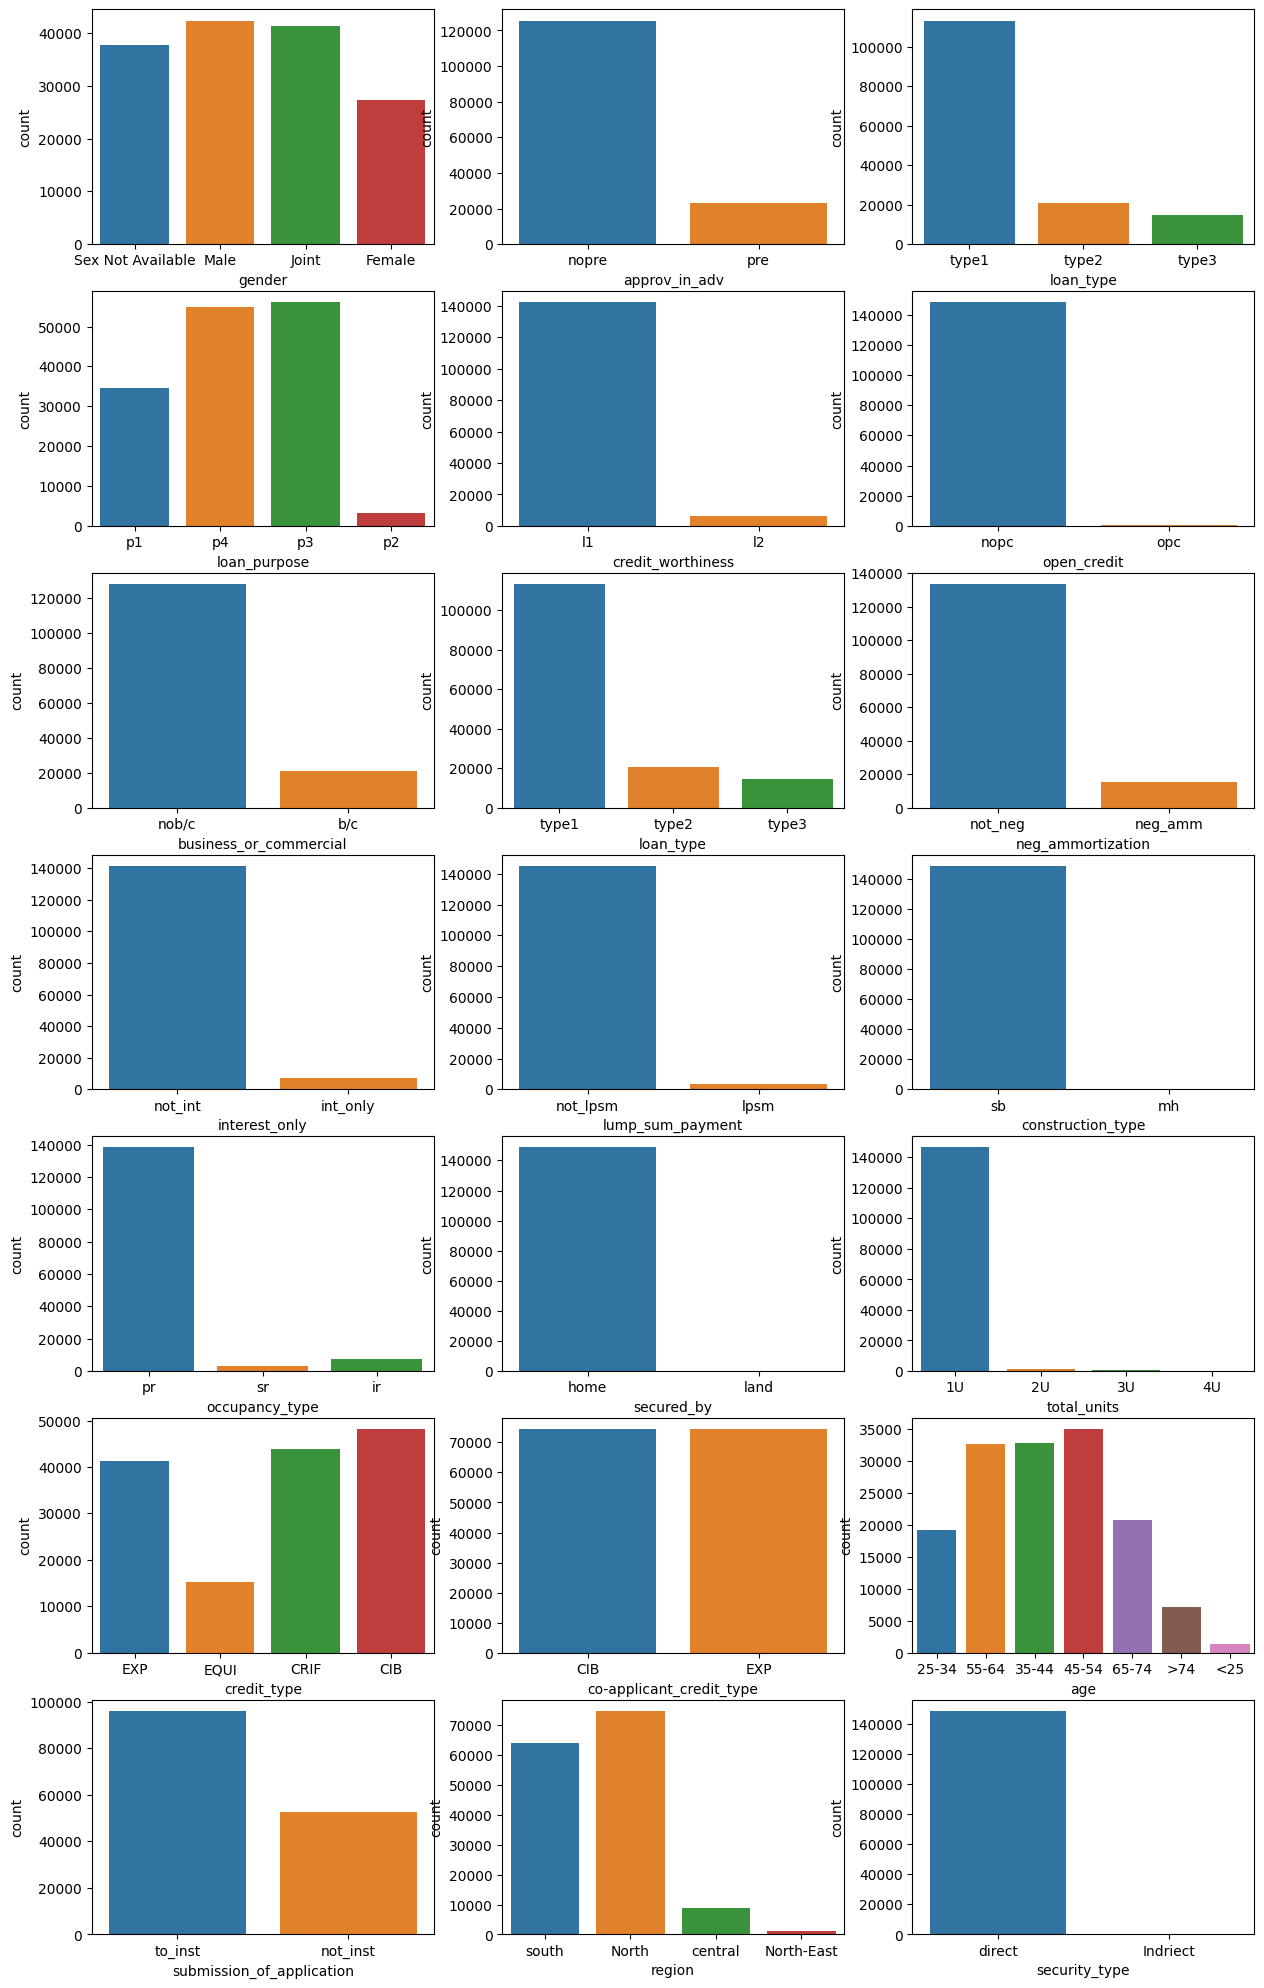

In [31]:
# Looking into Cateogiral columns
fig, axes = plt.subplots(nrows=7, ncols=3, figsize=(15,25))

categorical_variables = ["gender", "approv_in_adv", "loan_type","loan_purpose","credit_worthiness","open_credit","business_or_commercial","loan_type","neg_ammortization","interest_only","lump_sum_payment","construction_type","occupancy_type","secured_by","total_units","credit_type","co-applicant_credit_type","age","submission_of_application","region","security_type"]

i = 0;
while i < 21:
    for row in range(7):
        for col in range(3):
            sns.countplot(ax=axes[row][col], data=no_na_df, x=categorical_variables[i])
            i += 1


Skewness for loan_amount: 1.6669980938622415
Skewness for rate_of_interest: 0.4263518359750783
Skewness for interest_rate_spread: 0.2811339141071917
Skewness for upfront_charges: 1.885776951254163
Skewness for property_value: 4.574136214919592
Skewness for income: 17.219042798791868
Skewness for ltv: 114.31171666445027
Skewness for dtir1: -0.5873846252216476


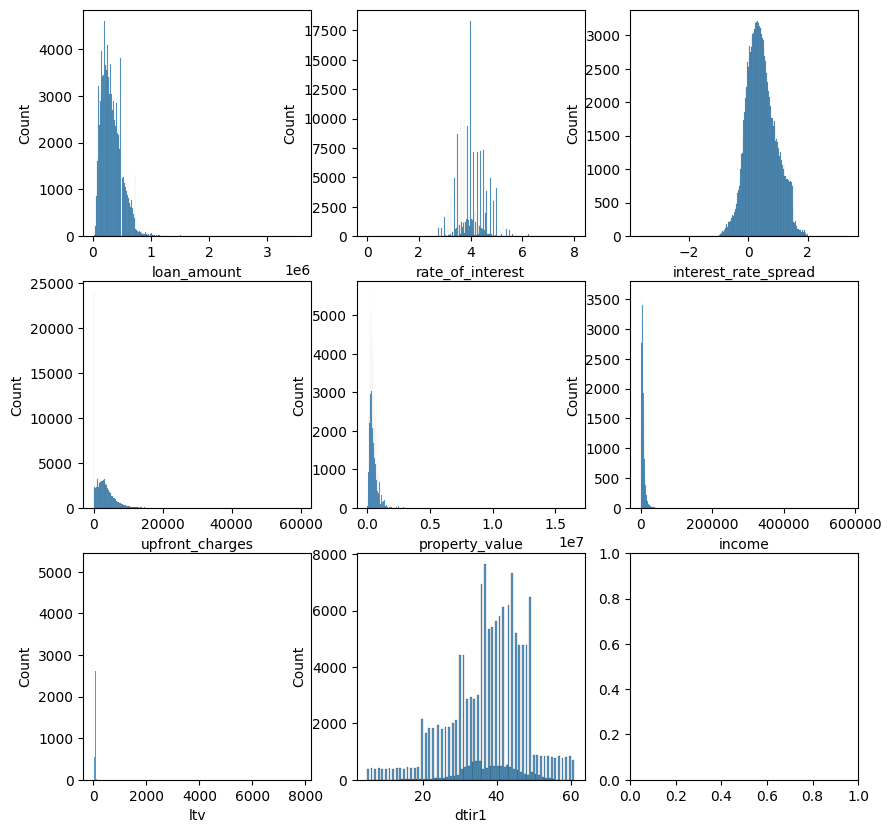

In [42]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(10,10))

numerical_cols = ['loan_amount', 'rate_of_interest','interest_rate_spread','upfront_charges','property_value','income','ltv','dtir1']

i = 0;
while i < len(numerical_cols):
    for row in range(3):
        for col in range(3):
            if i < len(numerical_cols):
                sns.histplot(ax=axes[row][col],data=no_na_df, x=numerical_cols[i])
                print("Skewness for " + numerical_cols[i] + ":", no_na_df[numerical_cols[i]].skew())
                i += 1

### Bivariate Analysis

Looking at the correlation between features, we can see that these features are highly related.
- rate_of_interest & interest_rate_spread
- loan_amount & property_value
- income & loan_amount 

<Axes: >

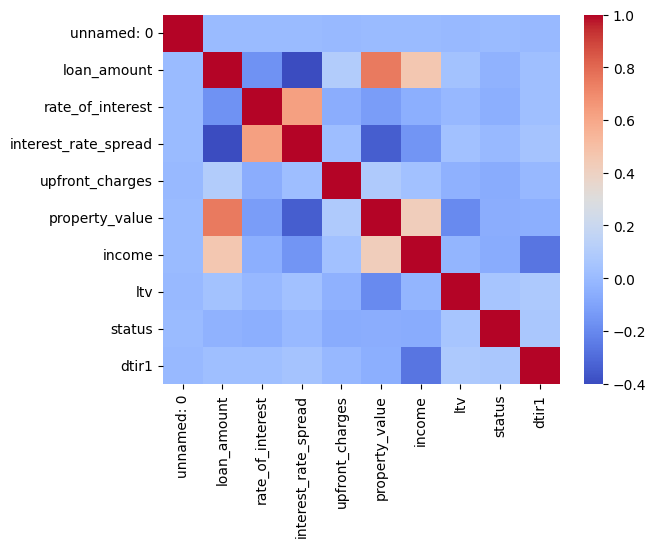

In [33]:
sns.heatmap(data=no_na_df.loc[:, ~no_na_df.columns.isin(['id','year','term','credit_score'])].corr(numeric_only= True), annot=False, cmap='coolwarm')

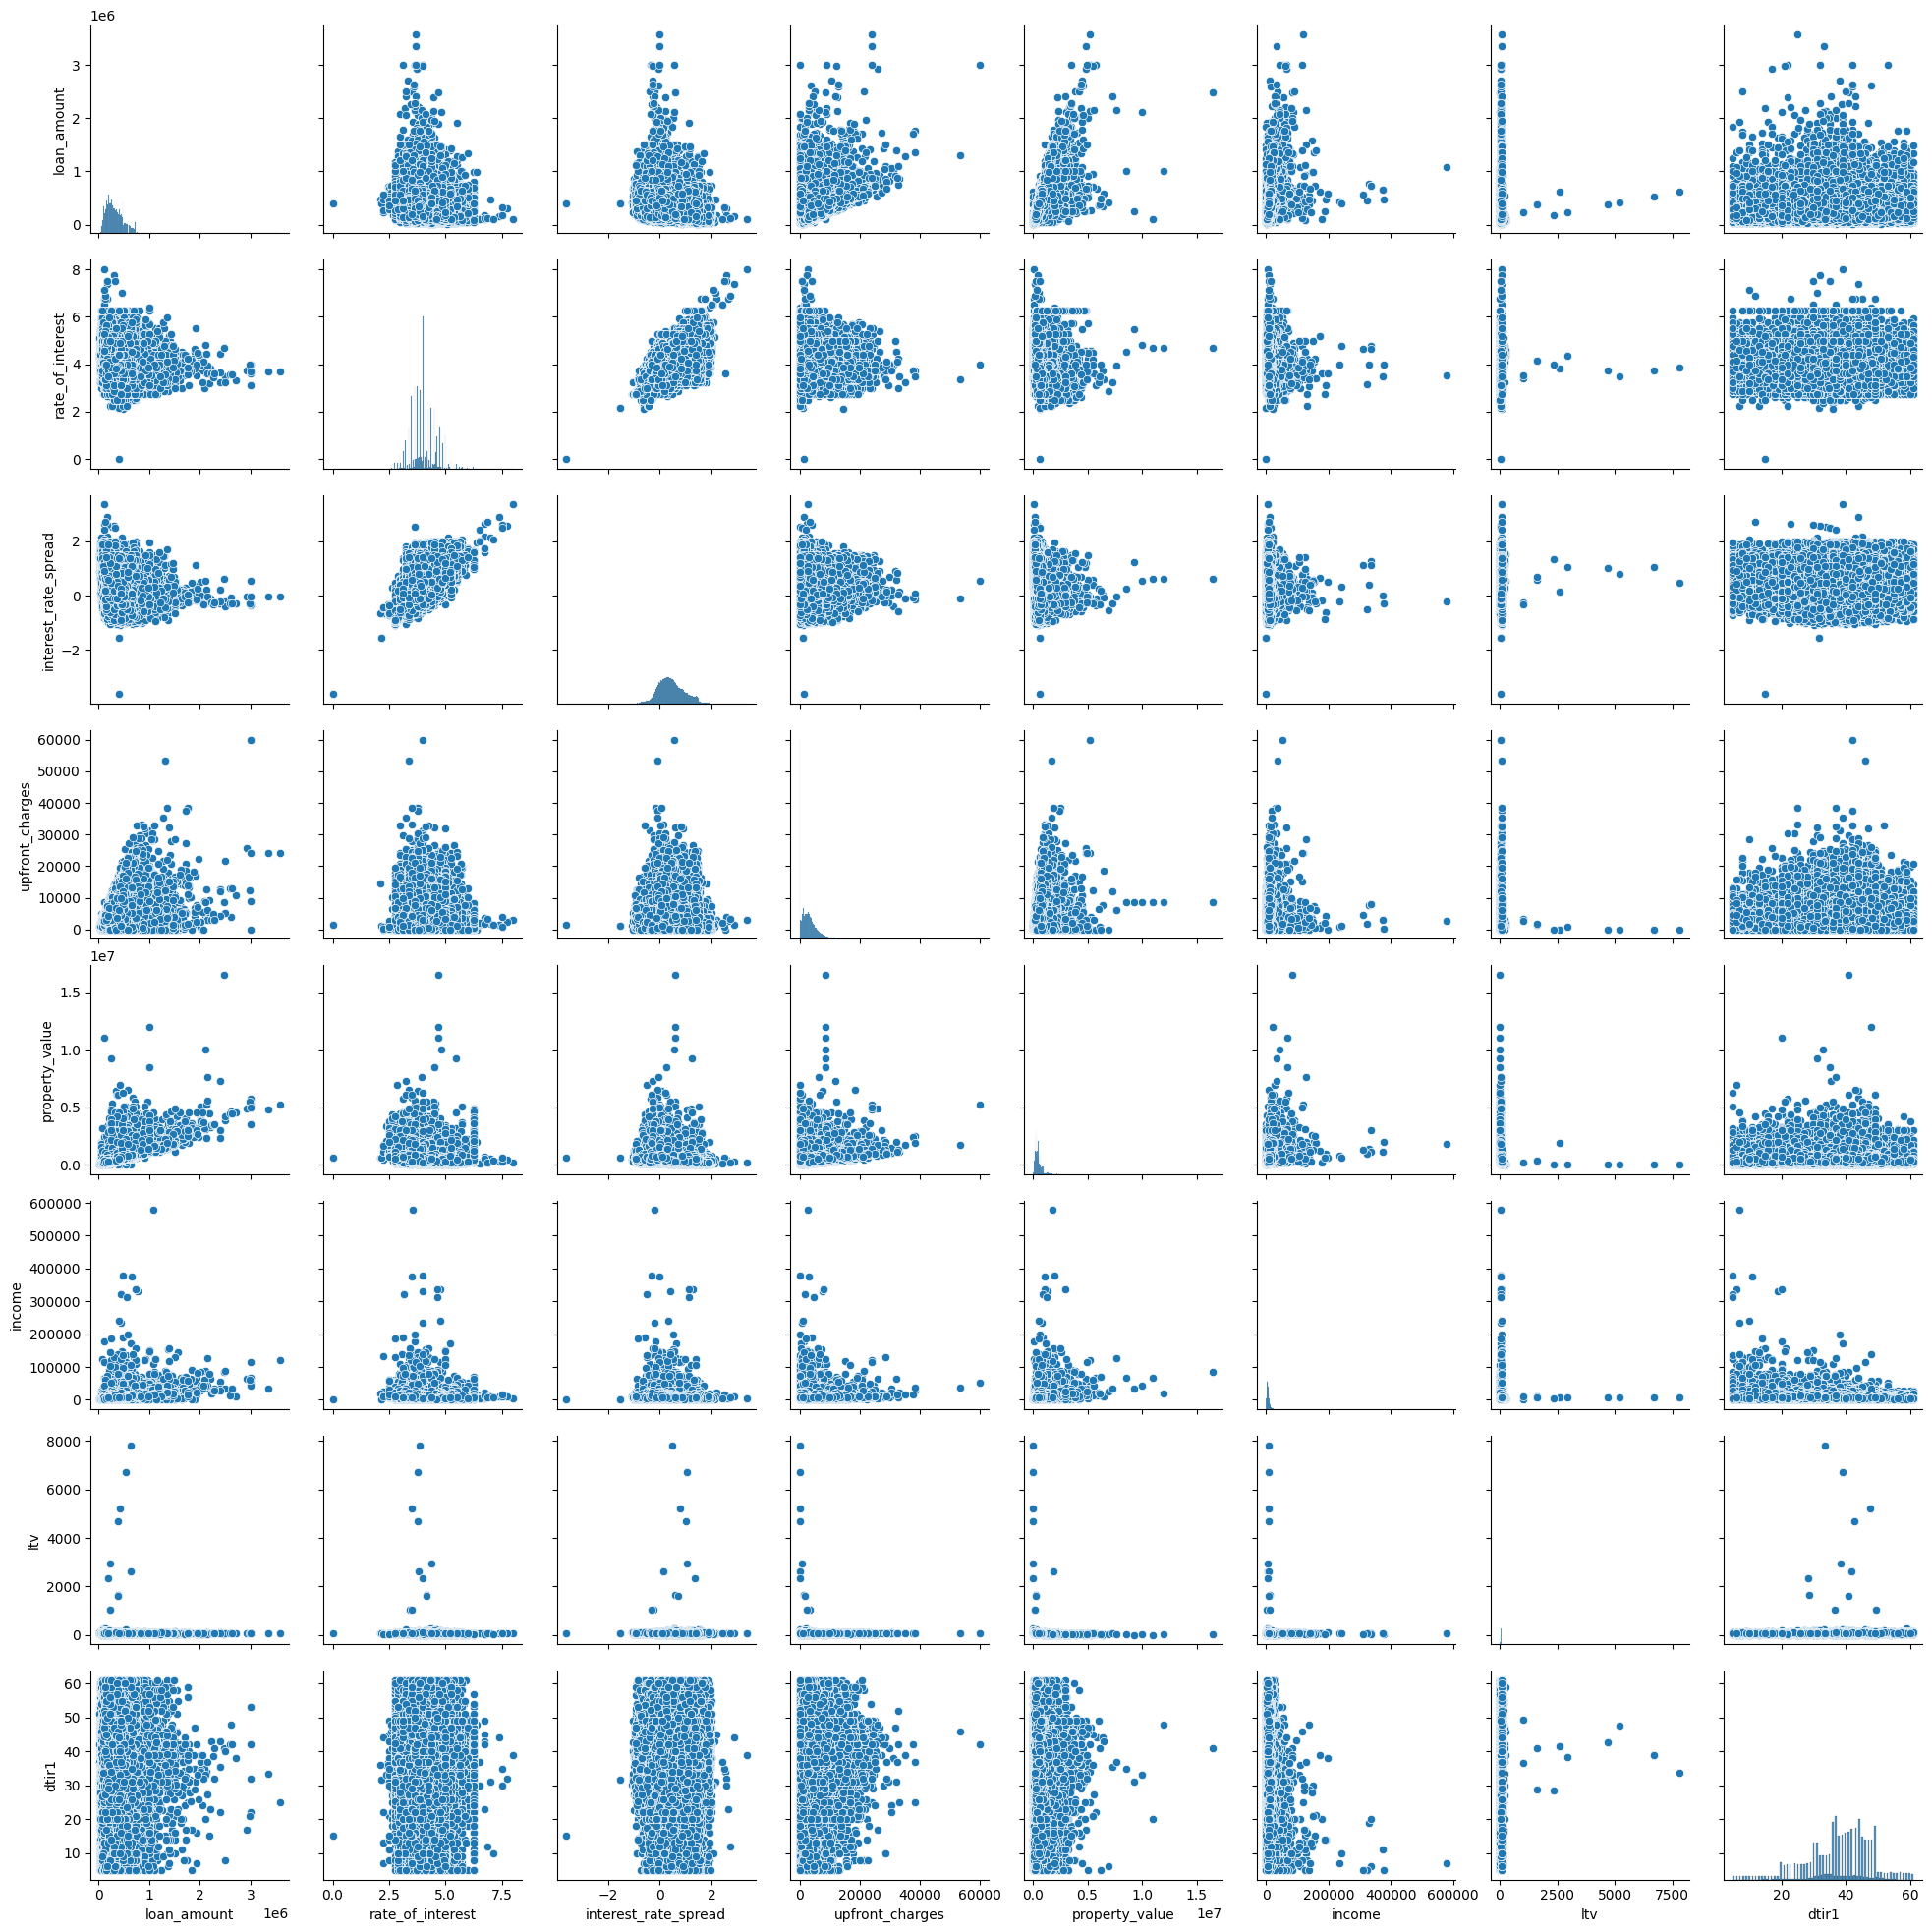

In [34]:
sns.pairplot(no_na_df[['loan_amount', 'rate_of_interest','interest_rate_spread','upfront_charges','property_value','income','ltv','dtir1']])

To look at the distribution of data

<Axes: xlabel='status', ylabel='ltv'>

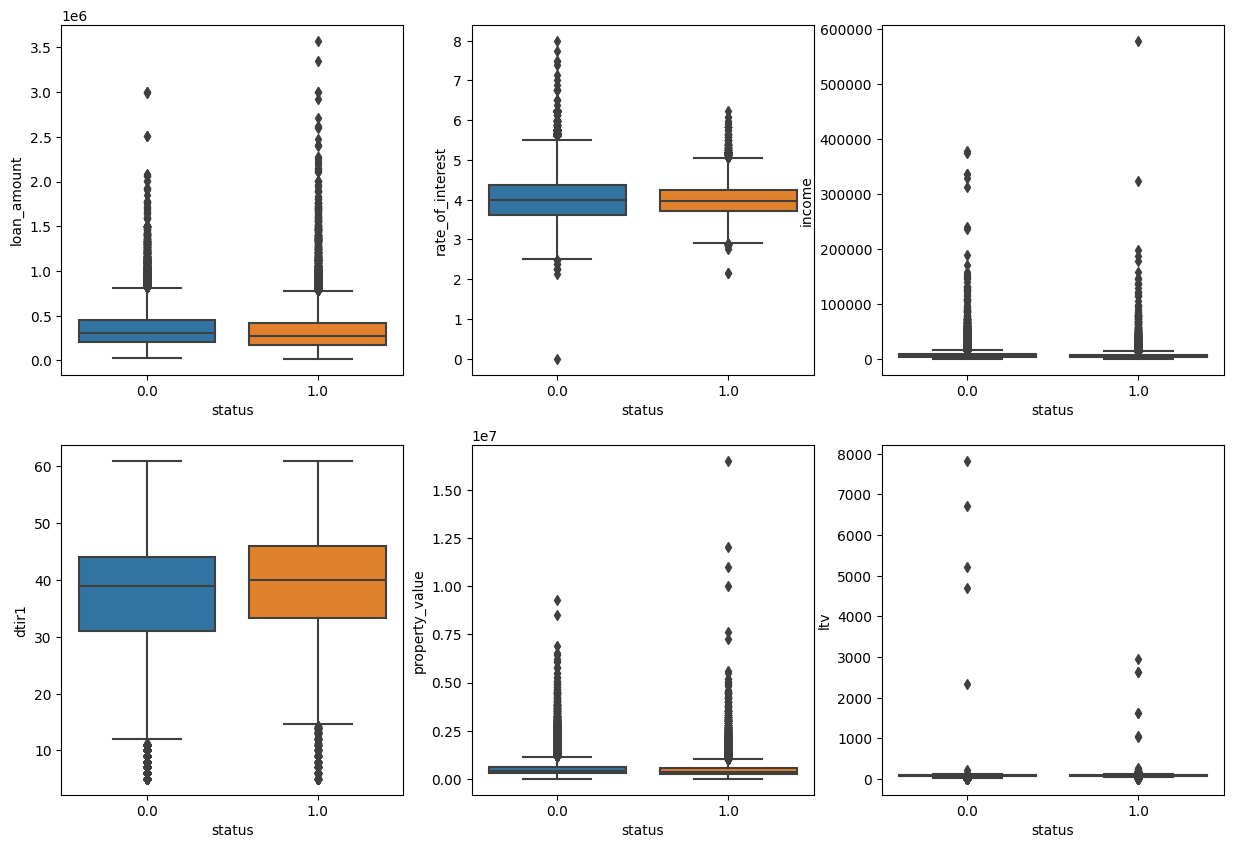

In [35]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

sns.boxplot(ax=axes[0,0],data=no_na_df, x='status', y='loan_amount')
sns.boxplot(ax=axes[0,1], data=no_na_df, x='status', y='rate_of_interest')
sns.boxplot(ax=axes[0,2],data=no_na_df, x='status', y='income')
sns.boxplot(ax=axes[1,0],data=no_na_df, x='status', y='dtir1')
sns.boxplot(ax=axes[1,1],data=no_na_df, x='status', y='property_value')
sns.boxplot(ax=axes[1,2],data=no_na_df, x='status', y='ltv')

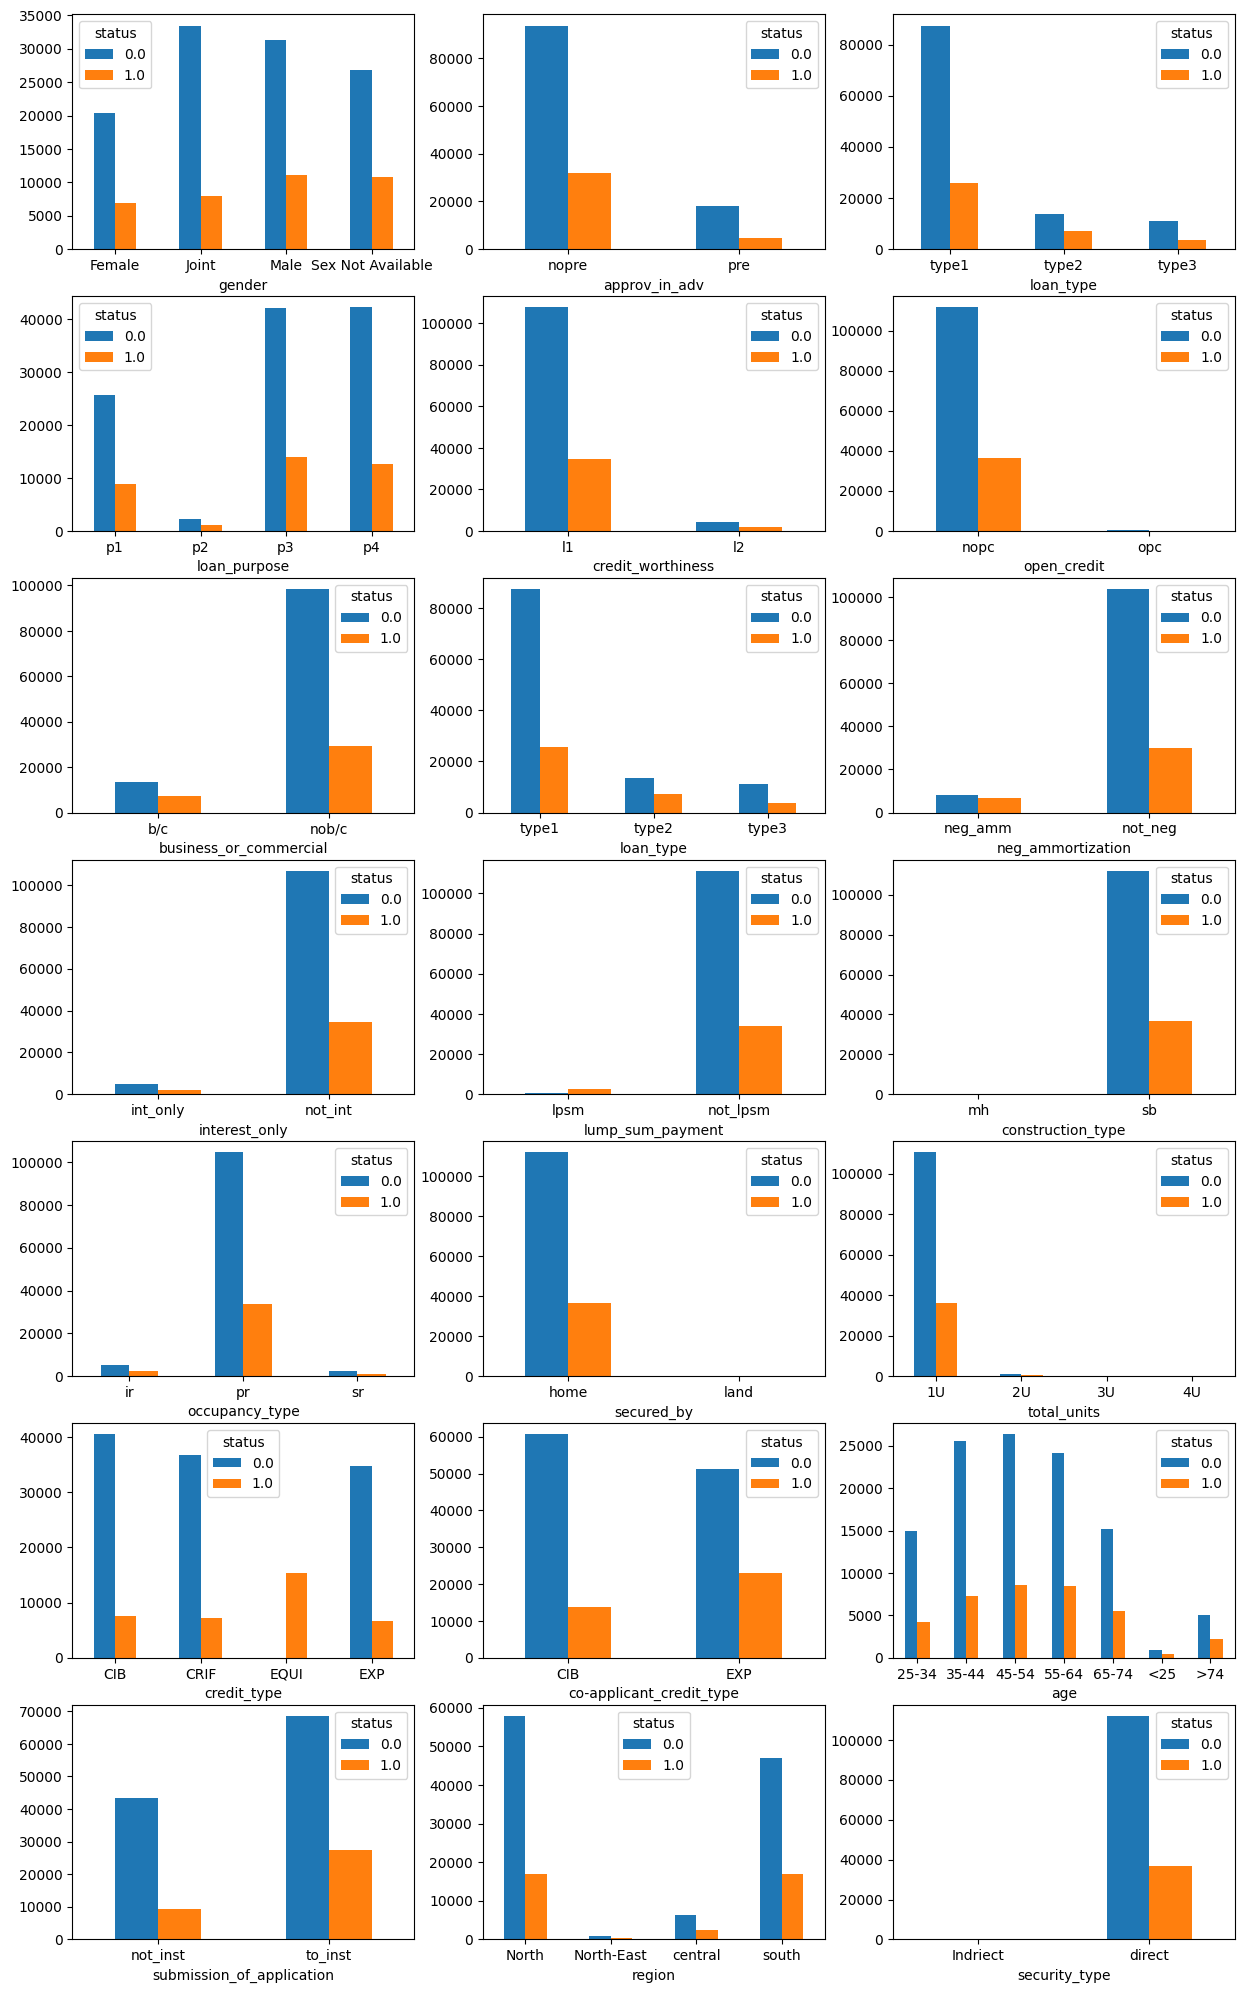

In [36]:
# Categorical variables to loan status
fig, axes = plt.subplots(nrows=7, ncols=3, figsize=(15,25))


categorical_variables = ["gender", "approv_in_adv", "loan_type","loan_purpose","credit_worthiness","open_credit","business_or_commercial","loan_type","neg_ammortization","interest_only","lump_sum_payment","construction_type","occupancy_type","secured_by","total_units","credit_type","co-applicant_credit_type","age","submission_of_application","region","security_type"]

i = 0;
while i < 21:
    for row in range(7):
        for col in range(3):
            no_na_df.groupby([categorical_variables[i], "status"]).size().unstack().plot(kind="bar", ax=axes[row,col])
            axes[row, col].tick_params(axis='x', rotation=360)
            i += 1